In [9]:
# to reload local packages when debugging
%load_ext autoreload
%autoreload 2

%cd /mnt/c/Users/Joseph/Documents/Github/balancing_framework/

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/mnt/c/Users/Joseph/Documents/Github/balancing_framework


In [2]:
import pickle
import pandas as pd
import numpy as np

with open('/mnt/c/Users/Joseph/Documents/Github/balancing_framework/spy5m_labelled_episodes.pkl', 'rb') as f:
    df_original = pickle.load(f)
with open('/mnt/c/Users/Joseph/Documents/Github/balancing_framework/spy5m_labelled_episodes_fracdiff.pkl', 'rb') as f:
    df_fd = pickle.load(f)
# PZ algorithm has some look ahead so remove the episode labels, will be uesd only for some kind of analysis afterwards
df = df_original.drop(columns=['episode']) 
# df



In [11]:
X.diff()

,volume,vwap,open,close,high,low,transactions
timestamp,,,,,,,
2003-09-10 08:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-09-10 08:05:00-04:00,600.0,0.0150,0.0000,0.0400,0.0400,0.00,3.0
2003-09-10 08:10:00-04:00,-300.0,-0.0135,0.0400,-0.0500,0.0000,-0.01,-2.0
2003-09-10 08:20:00-04:00,-1200.0,-0.0615,-0.1000,-0.0500,-0.1000,-0.05,-1.0
2003-09-10 08:25:00-04:00,17800.0,-0.0642,-0.0800,-0.0700,-0.0300,-0.08,4.0
...,...,...,...,...,...,...,...
2024-04-30 19:40:00-04:00,5472.0,0.1010,0.0201,0.1882,0.1182,0.06,22.0
2024-04-30 19:45:00-04:00,-6715.0,0.1579,0.2099,0.0818,0.1118,0.20,-31.0
2024-04-30 19:50:00-04:00,-1734.0,-0.0808,0.0300,-0.1600,-0.0300,-0.12,-6.0


In [10]:
from framework import run_measurements, viz
from fracdiff import frac_diff_bestd, frac_diff_ffd

X = df.drop(columns=['label'])
y = df['label']
chunk_size = 500_000
cold_start_size = 10_000
dataset_name = 'sp500'
model_name = 'random_forest'

# a,c,p = run_measurements(X, y, chunk_size, cold_start_size, dataset_name, model_name, num_runs=2, frac_diff=False)

In [23]:
a,c,p

([{'accuracy_mean': 0.53702,
   'f1_mean': 0.018569551023869084,
   'accuracy_std': 0.0,
   'f1_std': 0.0,
   'time_training_seconds': 1.9471456179999223,
   'time_test_seconds': 0.0645396410000103,
   'model_name': 'random_forest',
   'last_ts': Timestamp('2016-04-14 13:00:00-0400', tz='America/New_York')},
  {'accuracy_mean': 0.5154054916985952,
   'f1_mean': 0.3440775020708035,
   'accuracy_std': 0.0,
   'f1_std': 0.0,
   'time_training_seconds': 1.5454155884999636,
   'time_test_seconds': 0.03146190150005168,
   'model_name': 'random_forest',
   'last_ts': Timestamp('2024-04-30 20:00:00-0400', tz='America/New_York')}],
 [{'accuracy_mean': 0.520062,
   'f1_mean': 0.35061550659886936,
   'accuracy_std': 0.0,
   'f1_std': 0.0,
   'time_training_seconds': 3.5926471734996994,
   'time_test_seconds': 0.7007215000003271,
   'model_name': 'random_forest',
   'last_ts': Timestamp('2016-04-14 13:00:00-0400', tz='America/New_York')},
  {'accuracy_mean': 0.511566,
   'f1_mean': 0.3439770703442

In [ ]:
# save the results in jsons
import json
with open(f'/mnt/c/Users/Joseph/Documents/Github/balancing_framework/results/adaptation_results.json', 'w') as f:
    json.dump(a, f)
with open(f'/mnt/c/Users/Joseph/Documents/Github/balancing_framework/results/consolidation_results.json', 'w') as f:
    json.dump(c, f)

# with open(f'/mnt/c/Users/Joseph/Documents/Github/balancing_framework/results/prep_info.json', 'w') as f:
#     json.dump(p, f)


means: [0.53702    0.51540549], [0.520062 0.511566], std: [0. 0.], [0. 0.], timestamps: [Timestamp('2016-04-14 13:00:00-0400', tz='America/New_York')
 Timestamp('2024-04-30 20:00:00-0400', tz='America/New_York')], [Timestamp('2016-04-14 13:00:00-0400', tz='America/New_York')
 Timestamp('2024-04-30 20:00:00-0400', tz='America/New_York')]


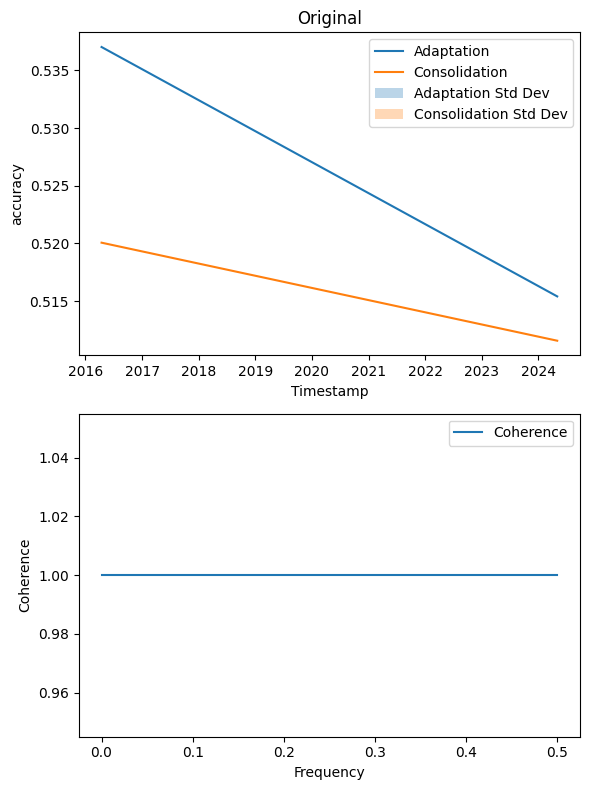

<Figure size 640x480 with 0 Axes>

In [31]:
viz(a, c, metric='accuracy', title='Original') # Frac Diff , First Order Diff

In [5]:
X, fd_change_pct = frac_diff_bestd(X)

volume
volume stationary with d=0.0 stat windows =9 out of 9 p-values = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
vwap
vwap stationary with d=0.25 stat windows =7 out of 9 p-values = [0.008095666767908991, 0.025931511376519768, 0.0013778592152762258, 0.1852128548194567, 1.6337951974871852e-06, 0.07308356800947235, 6.915786352112616e-08, 0.004419859336234985, 0.04946977381450395]
open
open stationary with d=0.25 stat windows =6 out of 9 p-values = [0.00771687291618469, 0.08563208621671398, 0.0011386828724444706, 0.17728860789708828, 5.727499914651303e-07, 0.06501883304278977, 9.094215141367207e-08, 0.0030737197484147, 0.04669310393262241]
close
close stationary with d=0.25 stat windows =6 out of 9 p-values = [0.007155320998279741, 0.0797247049068393, 0.0011311314942169775, 0.1686332629329363, 8.000171012087326e-07, 0.06518248544906258, 9.703437632746902e-08, 0.0029871989932518214, 0.04567940334522573]
high
high stationary with d=0.2 stat windows =6 out of 9 p-values = [0.03389280655

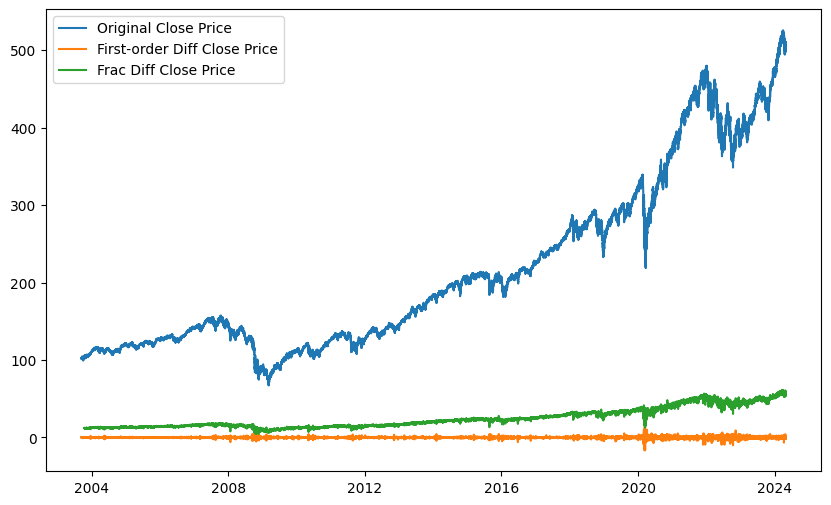

In [6]:
close = df['close']
close_diff = close.diff().dropna()
close_frac_diff = X['close'].dropna()


import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(close, label='Original Close Price')
plt.plot(close_diff, label='First-order Diff Close Price')
plt.plot(close_frac_diff, label='Frac Diff Close Price')
plt.legend()
plt.show()

In [7]:
# filter the labels by the fractionally differentiated data index
y = df['label'][X.index]
fd_df = pd.concat([X, y], axis=1).dropna()

# pickle it
with open('/mnt/c/Users/Joseph/Documents/Github/balancing_framework/spy5m_labelled_episodes_fracdiff.pkl', 'wb') as f:
    pickle.dump(fd_df, f)

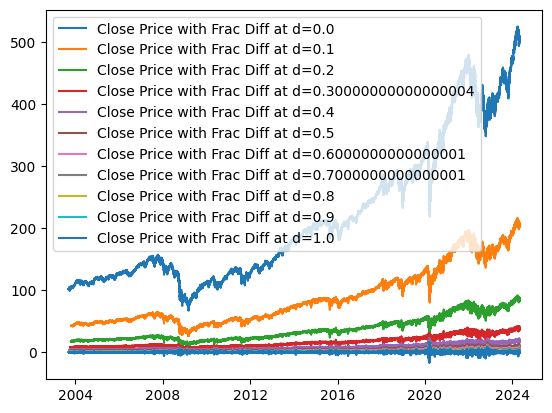

In [32]:
# frac_diff_test = frac_diff_ffd(X[['close']], 0.9)

# iterate through a range of intervals for d and plot the frac diff results

d_tests = np.arange(0,1.1,0.1)
# plt.figure(figsize=(10,6))
for d in d_tests:
    frac_diff_test = frac_diff_ffd(df[['close']], d)
    plt.plot(frac_diff_test['close'].dropna(), label=f'Close Price with Frac Diff at d={d}')
plt.legend()
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller
# calc the adf in chunks of 100k

adf_chunk_size = 100_000
num_stat = (0,0) # number of stationary windows, total number of windows
p_values = []
for i in range(0, len(frac_diff_test), adf_chunk_size):
    data_chunk = frac_diff_test['close'].dropna()[i:i+adf_chunk_size]
    adf_result = adfuller(data_chunk) 
    print(f'{i} p-value={adf_result[1]}, lags={adf_result[2]}')
    num_stat = (num_stat[0], num_stat[1]+1)
    p_values.append(adf_result[1])
    if adf_result[1] < 0.05:
        num_stat = (num_stat[0]+1, num_stat[1])
# if more than 50% of the p-values are above 0.05, then the data is not stationary
stationary = num_stat[0] > num_stat[1]/2
stationary, num_stat, p_values


0 p-value=0.0, lags=68
100000 p-value=0.0, lags=68
200000 p-value=0.0, lags=67
300000 p-value=0.0, lags=68
400000 p-value=0.0, lags=68
500000 p-value=0.0, lags=66
600000 p-value=0.0, lags=68
700000 p-value=0.0, lags=68
800000 p-value=0.0, lags=64


(True, (9, 9), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])